In [ ]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving multiple_vehicle.jpg to multiple_vehicle.jpg


In [ ]:
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection on uploaded image
results = model(image_path)

# Get list of detected labels
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

# Define vehicle-related labels
vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']

# Count how many of the detected labels are vehicles
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

# Output result
if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 128MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'person', 'motorcycle', 'truck', 'car']
It's a Vehicle! Total vehicles detected: 20


In [ ]:
# Render the results (modifies results.ims with annotated image in BGR format)
results.render()

# Load original image
original_img = Image.open(image_path).convert("RGB")

# Convert annotated image (BGR NumPy array) to RGB for correct display
annotated_img_bgr = results.ims[0]
annotated_img_rgb = cv2.cvtColor(annotated_img_bgr, cv2.COLOR_BGR2RGB)

# Show original and annotated images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_img_rgb)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline


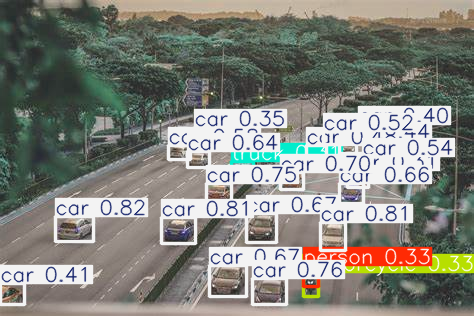

In [ ]:
from google.colab.patches import cv2_imshow

# Display annotated image
cv2_imshow(annotated_img_bgr)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 


Saving multiple_vehicle.jpg to multiple_vehicle (2).jpg


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'person', 'motorcycle', 'truck', 'car']
It's a Vehicle! Total vehicles detected: 20

Original Image:


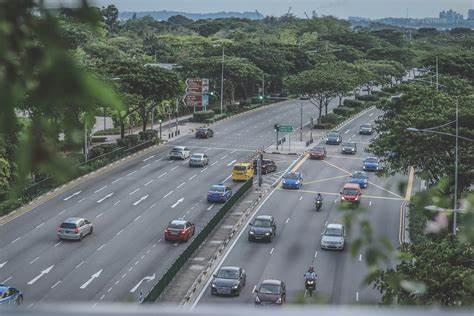

Annotated Image:


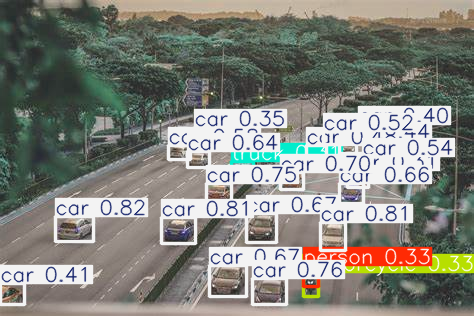

In [ ]:
import torch
from google.colab import files
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import io

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load original image (for display)
original_img = Image.open(image_path).convert("RGB")

# Convert original image to OpenCV format for display with cv2_imshow
original_np = np.array(original_img)
original_bgr = cv2.cvtColor(original_np, cv2.COLOR_RGB2BGR)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection
results = model(image_path)

# Label extraction
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

# Vehicle count
vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")

# Render annotated image
results.render()
annotated_bgr = results.ims[0]  # already in OpenCV BGR format

# Show original and annotated images
print("\nOriginal Image:")
cv2_imshow(original_bgr)

print("Annotated Image:")
cv2_imshow(annotated_bgr)


Saving multiple_vehicle.jpg to multiple_vehicle (3).jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'person', 'motorcycle', 'truck', 'car']
It's a Vehicle! Total vehicles detected: 20


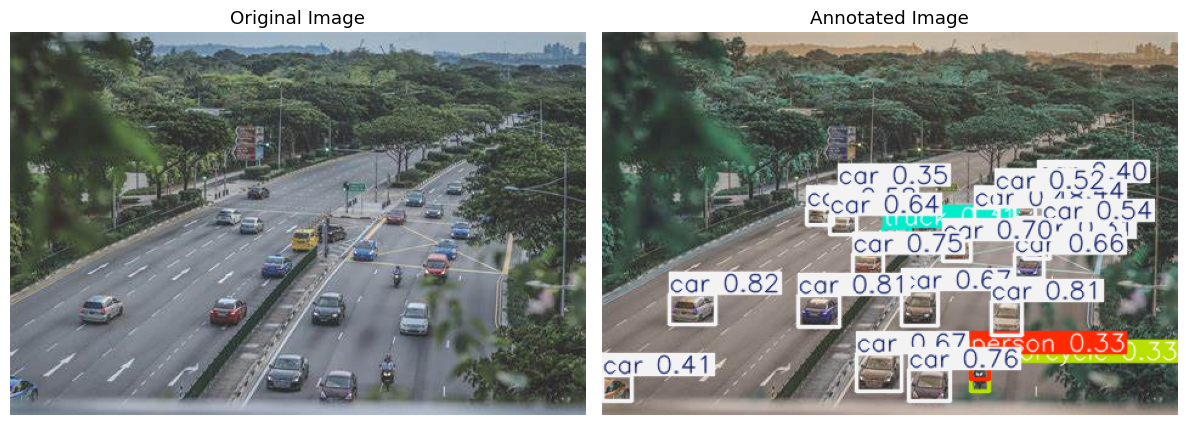

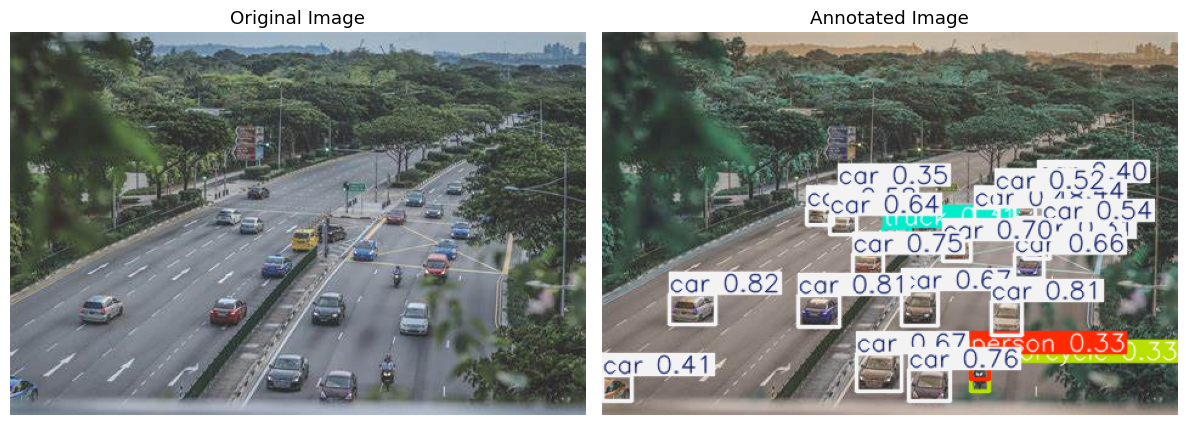

In [ ]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import io

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load original image
original_img = Image.open(image_path).convert("RGB")
original_np = np.array(original_img)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection
results = model(image_path)

# Vehicle detection summary
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")

# Render annotated image (BGR format)
results.render()
annotated_bgr = results.ims[0]
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

# Display original and annotated images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_rgb)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 


Saving multiple_vehicle.jpg to multiple_vehicle (4).jpg


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'person', 'motorcycle', 'truck', 'car']
It's a Vehicle! Total vehicles detected: 20


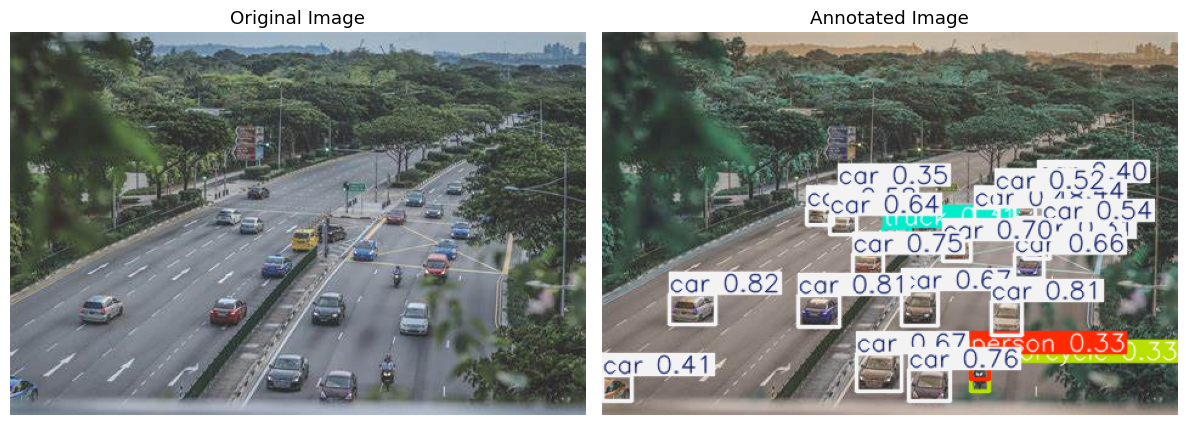

In [ ]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load original image
original_img = Image.open(image_path).convert("RGB")
original_np = np.array(original_img)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection
results = model(image_path)

# Vehicle detection summary
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")

# Render annotated image
results.render()
annotated_bgr = results.ims[0]
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

# Display side by side using matplotlib (ONLY)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_rgb)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


Saving one_vehicle.jpg to one_vehicle.jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: ['car']
It's a Vehicle! Total vehicles detected: 1


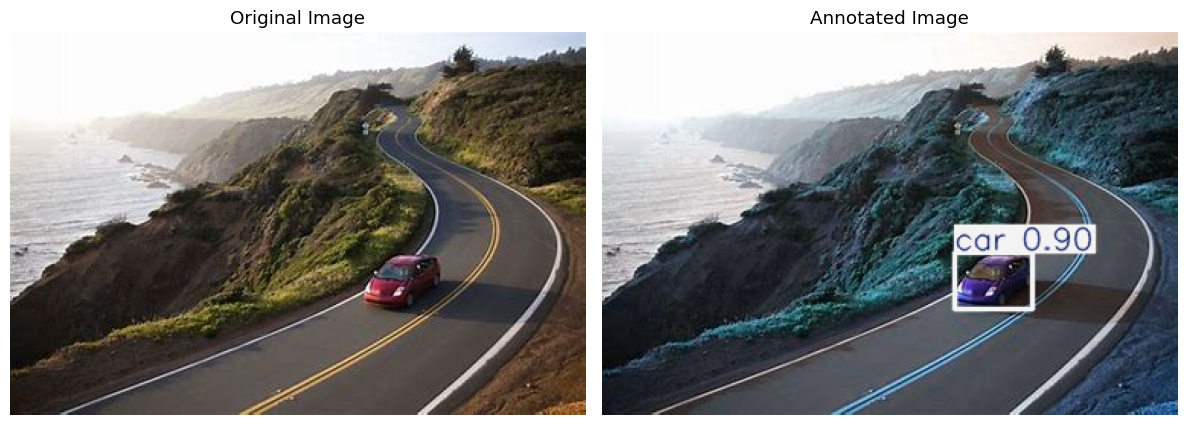

In [ ]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load original image
original_img = Image.open(image_path).convert("RGB")
original_np = np.array(original_img)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection
results = model(image_path)

# Vehicle detection summary
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")

# Render annotated image
results.render()
annotated_bgr = results.ims[0]
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

# Display side by side using matplotlib (ONLY)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_rgb)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-25 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 


Saving no_vehicle.jpg to no_vehicle.jpg


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected labels: []
Not a Vehicle.


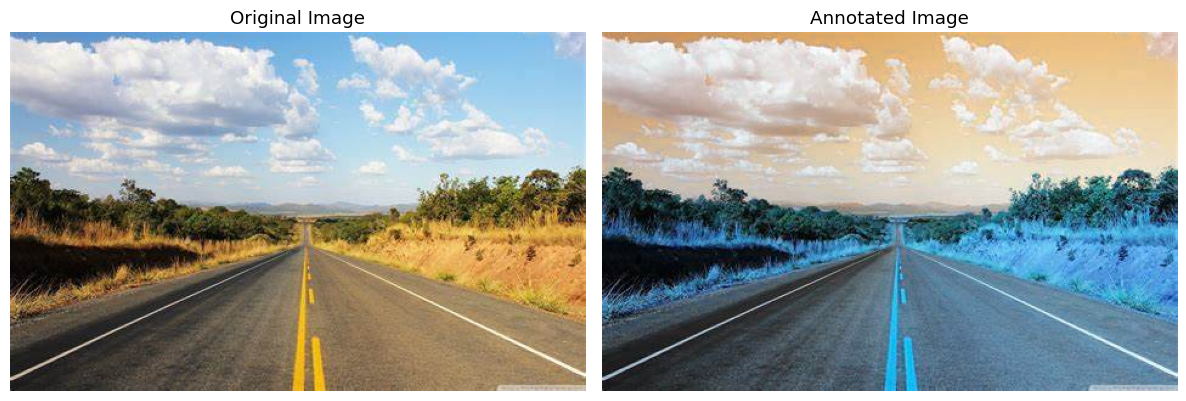

In [ ]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load original image
original_img = Image.open(image_path).convert("RGB")
original_np = np.array(original_img)

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Run detection
results = model(image_path)

# Vehicle detection summary
labels = results.pandas().xyxy[0]['name'].tolist()
print("Detected labels:", labels)

vehicle_labels = ['car', 'truck', 'bus', 'motorbike', 'van']
vehicle_count = sum(1 for label in labels if label in vehicle_labels)

if vehicle_count > 0:
    print(f"It's a Vehicle! Total vehicles detected: {vehicle_count}")
else:
    print("Not a Vehicle.")

# Render annotated image
results.render()
annotated_bgr = results.ims[0]
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

# Display side by side using matplotlib (ONLY)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_rgb)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()
